# **Image to text**

**Import libraries**

In [102]:
import easyocr
from matplotlib import pyplot as plt
from PIL import Image
import cv2
import numpy as np

**original image**

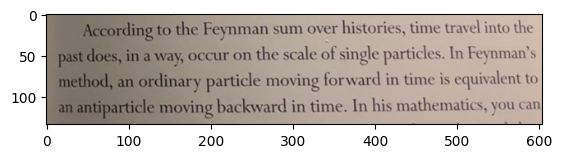

In [103]:
image_url = 'D:\\MyProjects\\Projects\\img-to-txt-to-exp\\input_images\\20240125_004730000_iOS.jpg'
image_org = Image.open(image_url)
image_org = np.array(image_org)
plt.imshow(image_org)

In [104]:
read = easyocr.Reader(['en'])
res_org  = read.readtext(image_org)
res_org

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[38, 1], [599, 1], [599, 39], [38, 39]],
  'According to the Feynman sum over histories, time travel into the',
  0.7583409319219662),
 ([[44, 36], [410, 36], [410, 68], [44, 68]],
  'does, in a way; occur on the scale of single',
  0.6056913908248204),
 ([[486, 36], [600, 36], [600, 64], [486, 64]],
  "In Feynman'$",
  0.6653028694764641),
 ([[12, 70], [110, 70], [110, 94], [12, 94]],
  'method, an',
  0.7454631969913249),
 ([[108, 67], [192, 67], [192, 98], [108, 98]],
  'ordinary',
  0.9999085817546964),
 ([[264, 68], [496, 68], [496, 98], [264, 98]],
  'moving forward in time is',
  0.933437027947265),
 ([[491, 61], [603, 61], [603, 98], [491, 98]],
  'equivalent to',
  0.7217858771156608),
 ([[33, 99], [136, 99], [136, 129], [33, 129]],
  'antiparticle',
  0.9999576372383909),
 ([[204, 98], [604, 98], [604, 126], [204, 126]],
  'backward in time. In his mathematics, YOu can',
  0.51337011882027),
 ([[404.41000317999044, 38.456005087984735],
   [485.7725006390444, 32.85403306919

**BGR image**

In [105]:
image_bgr565 = cv2.cvtColor(image_org, cv2.COLOR_RGB2BGR565)
image_bgr = cv2.cvtColor(image_bgr565, cv2.COLOR_BGR5652BGR)

In [106]:
read = easyocr.Reader(['en'])
res_bgr  = read.readtext(image_bgr)
res_bgr

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[38, 1], [599, 1], [599, 39], [38, 39]],
  'According to the Feynman sum over histories, time travel into the',
  0.7307102928832467),
 ([[7, 33], [411, 33], [411, 69], [7, 69]],
  'past does, in a way; occur on the scale of single',
  0.6940732932688037),
 ([[486, 36], [600, 36], [600, 64], [486, 64]],
  'In Feynman $',
  0.7370723002066482),
 ([[12, 70], [110, 70], [110, 94], [12, 94]],
  'method, an',
  0.9799063799476506),
 ([[108, 67], [192, 67], [192, 98], [108, 98]],
  'ordinary',
  0.9999051255797671),
 ([[264, 68], [496, 68], [496, 98], [264, 98]],
  'moving forward in time is',
  0.9367151912420256),
 ([[491, 61], [603, 61], [603, 98], [491, 98]],
  'equivalent to',
  0.7914447737082958),
 ([[33, 99], [136, 99], [136, 129], [33, 129]],
  'antiparticle',
  0.9999552626824059),
 ([[204, 98], [604, 98], [604, 126], [204, 126]],
  'backward in time. In his mathematics, YOu can',
  0.49002031416741637),
 ([[404.41000317999044, 38.456005087984735],
   [485.7725006390444, 32.8540

**GrayScaled Image pre-processing**

In [107]:
image_gray = cv2.cvtColor(image_org, cv2.COLOR_RGB2GRAY)

In [108]:
read = easyocr.Reader(['en'])
res_gray  = read.readtext(image_gray)
res_gray

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[39, 1], [599, 1], [599, 40], [39, 40]],
  'According to the Feynman sum over histories; time travel into the',
  0.688802236963748),
 ([[44, 36], [410, 36], [410, 68], [44, 68]],
  'does, in a way; occur on the scale of single',
  0.7031801767881473),
 ([[486, 36], [598, 36], [598, 64], [486, 64]],
  'In Feynman s',
  0.6854348406725931),
 ([[12, 70], [110, 70], [110, 94], [12, 94]],
  'method, an',
  0.9822956419525641),
 ([[108, 67], [192, 67], [192, 98], [108, 98]],
  'ordinary',
  0.9998993512276867),
 ([[264, 68], [496, 68], [496, 98], [264, 98]],
  'moving forward in time is',
  0.9359097632067708),
 ([[491, 61], [603, 61], [603, 98], [491, 98]],
  'equivalent to',
  0.7304471471230161),
 ([[33, 99], [136, 99], [136, 129], [33, 129]],
  'antiparticle',
  0.9999613195126966),
 ([[204, 96], [604, 96], [604, 126], [204, 126]],
  'backward in time. In his mathematics, you can',
  0.7940058477527762),
 ([[404.41000317999044, 38.456005087984735],
   [484.7535711078804, 31.809266547

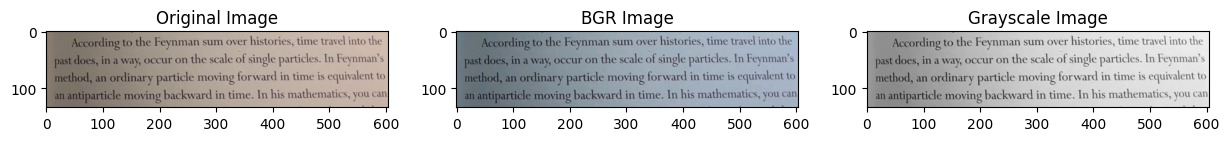

In [109]:
# Plot
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(image_org)
plt.title('Original Image')

plt.subplot(132)
plt.imshow(image_bgr)
plt.title('BGR Image')

plt.subplot(133)
plt.imshow(image_gray, cmap='gray')  
plt.title('Grayscale Image')

plt.show()

**images performance-comparison**

In [110]:
# Calculate total accuracy for each image
total_accuracy_original = sum([float(result[2]) for result in res_org]) / len(res_org)
total_accuracy_bgr = sum([float(result[2]) for result in res_bgr]) / len(res_bgr)
total_accuracy_gray = sum([float(result[2]) for result in res_gray]) / len(res_gray)

print(f' Original image total accuracy:{round(total_accuracy_original * 100, 3)}%')
print(f' bgr image total accuracy: {round(total_accuracy_bgr * 100, 3)}%')
print(f' Gray image total accuracy: {round(total_accuracy_gray * 100, 3)}%')


 Original image total accuracy:74.086%
 bgr image total accuracy: 78.315%
 Gray image total accuracy: 79.456%


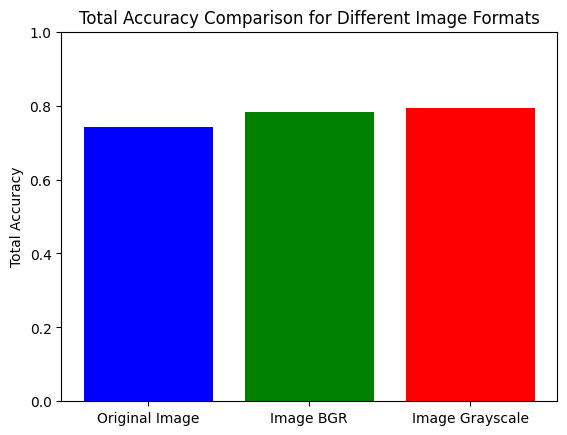

In [111]:
# Image formats comaprison
labels = ['Original Image', 'Image BGR', 'Image Grayscale']
accuracies = [total_accuracy_original, total_accuracy_bgr, total_accuracy_gray]

plt.bar(labels, accuracies, color=['blue', 'green', 'red'])
plt.ylim(0, 1) 
plt.ylabel('Total Accuracy')
plt.title('Total Accuracy Comparison for Different Image Formats')
plt.show()

In [112]:
max_accuracy_image = max(total_accuracy_original, total_accuracy_bgr, total_accuracy_gray)
    
if max_accuracy_image == total_accuracy_original:
        ocr_final_txt = ' '.join(result[1] for result in res_org)
elif max_accuracy_image == total_accuracy_bgr:
        ocr_final_txt = ' '.join(result[1] for result in res_bgr)
else:
        ocr_final_txt = ' '.join(result[1] for result in res_gray)

ocr_final_txt

'According to the Feynman sum over histories; time travel into the does, in a way; occur on the scale of single In Feynman s method, an ordinary moving forward in time is equivalent to antiparticle backward in time. In his mathematics, you can particles. past = particle moving'

# **Text processing**

**Import libraries**

In [113]:
import pandas as pd
import re
import difflib

**Import necessary dataset(s)**

In [114]:
words_en_data = pd.read_csv("D:\Dataset\EnglishWords_dataset\words_pos.csv")

**Data pre-processing**

In [115]:
words_en_data.shape

(370100, 3)

In [116]:
words_en_data.head()

,Unnamed: 0,word,pos_tag
0,0,aa,NN
1,1,aaa,NN
2,2,aah,NN
3,3,aahed,VBN
4,4,aahing,VBG


In [117]:
words_en = words_en_data['word'].to_list()

**clean the text**

In [118]:
ocr_final_txt = re.sub(r'[^A-Za-z\s]', '', ocr_final_txt)
ocr_final_txt = ocr_final_txt.lower()
ocr_final_txt = re.sub(r'\s+', ' ', ocr_final_txt )
ocr_final_txt

'according to the feynman sum over histories time travel into the does in a way occur on the scale of single in feynman s method an ordinary moving forward in time is equivalent to antiparticle backward in time in his mathematics you can particles past particle moving'

**Example**

In [119]:
# Check if some words are found in this list
trg_word = 'inn'

if trg_word in words_en:
    print(f'"{trg_word}" is in the list!')
else:
    print(f'"{trg_word}" is not in the list.')

"inn" is in the list!


**Words correction**

In [120]:
def correct_sentence(paragraph, words_list):
    corrected_paragraph = []
    
    for word in paragraph.split():
        if word in words_list:
            corrected_paragraph.append(word)
        else:
            closest_match = difflib.get_close_matches(word, words_list, n=1)
            
            if closest_match:
                replacement_word = closest_match[0]
                corrected_paragraph.append(replacement_word)
            else:
                corrected_paragraph.append(word)
                
    corrected_sentence = ' '.join(corrected_paragraph)
    return corrected_sentence

correct_sentence(ocr_final_txt, words_en)

'according to the fenman sum over histories time travel into the does in za way occur on the scale of single in fenman s method an ordinary moving forward in time is equivalent to antiparticle backward in time in his mathematics you can particles past particle moving'

# **Summarizer API (Chat GPT)**

In [121]:
import requests

url = "https://chatgpt-42.p.rapidapi.com/conversationgpt4"

payload = {
	"messages": [
		{
			"role": "user",
			"content": correct_sentence(ocr_final_txt, words_en) + "write this paragraph properly and then explain it briefly and in simple words"
		}
	],
	"system_prompt": "",
	"temperature": 0.9,
	"top_k": 5,
	"top_p": 0.9,
	"max_tokens": 256,
	"web_access": False
}
headers = {
	"content-type": "application/json",
	"X-RapidAPI-Key": "b865073daemshf674c7a23a93a1cp19e6f1jsnf23ac36a8ac7",
	"X-RapidAPI-Host": "chatgpt-42.p.rapidapi.com"
}

response = requests.post(url, json=payload, headers=headers)
print(response.json())

{'result': 'In Feynman\'s approach to quantum mechanics, time travel doesn\'t occur on a single event scale, but rather through a concept called "sum over histories." According to Feynman, an ordinary particle moving forward in time is mathematically equivalent to an antiparticle moving backward in time. This means that when a particle moves from point A to B along a certain path, its motion is accompanied by all possible alternative paths it could have taken - including those where it travels back in time like an antiparticle. These alternate paths interfere with each other, leading to the observed probability distribution for the actual path taken by the particle. Simply put, every possible trajectory of a particle through space and time contributes to the final outcome, even if some of those possibilities involve traveling backwards in time as an antiparticle.', 'status': True, 'server_code': 1}
